# Importing data

In [ ]:
!pip install gdown

In [ ]:
import pandas as pd
import numpy as np
import gdown
from IPython.display import display

file_id = "1f0v-bwSuFMkpSqLUFgInvru3VgT_DM_T"
gid = "1550007725" # Current GID for Group 43 data
export_url = f"https://docs.google.com/spreadsheets/d/{file_id}/export?format=xlsx&gid={gid}"

output_file = "GR43_data.xlsx"
gdown.download(export_url, output_file, quiet=True, fuzzy=True)
df = pd.read_excel(output_file, header=1)

# Removing columns after year 10.4
idx = df.columns.get_loc('Year 10.4')
df = df.iloc[:, :idx + 1]
df.set_index('Borrower Number', inplace=True)
print(f"Kept columns up to 'Year 10.4' (index {idx})")


# Displaying cleaned data
print("\nPreview of cleaned data (first 5 rows):")
print(f"Shape: {df.shape[0]} rows × {df.shape[1]} columns")
display(df.head())

Kept columns up to 'Year 10.4' (index 50)

Preview of cleaned data (first 5 rows):
Shape: 2000 rows × 50 columns


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10,...,Year 1.4,Year 2.4,Year 3.4,Year 4.4,Year 5.4,Year 6.4,Year 7.4,Year 8.4,Year 9.4,Year 10.4
Borrower Number,,,,,,,,,,,,,,,,,,,,,
1,2,6,8,8,1,4,1,4,5,3,...,1.917812,1.205910,1.166873,1.761515,1.777030,1.171338,1.254077,1.591952,1.552267,1.742642
2,6,8,7,1,3,3,6,2,2,1,...,1.584840,1.266854,1.338586,1.399290,1.692835,1.321915,1.180970,1.603189,1.141988,1.755422
3,4,1,7,7,2,5,1,2,8,6,...,1.124593,1.535166,1.633333,1.380973,1.655417,1.759842,1.104140,1.540935,1.275862,1.487634
4,3,1,8,8,6,7,4,5,7,8,...,1.119240,1.773313,1.527232,1.526201,1.900152,1.471244,1.869658,1.036330,1.149928,1.120718
5,5,7,3,2,4,8,1,1,7,8,...,1.710565,1.112312,1.478229,1.032410,1.316871,1.581639,1.530024,1.674451,1.736276,1.619870


# Creating dataframes for each
1.   Rating,
2.   Amount in crores,
3.   Loss Given Default and
4.   Exposure at Default

In [ ]:
# Identifying the relevant columns for each category
rating_cols = [col for col in df.columns if col.endswith('.1')]
amount_cols = [col for col in df.columns if col.endswith('.2')]
lgd_cols = [col for col in df.columns if col.endswith('.3')]
ead_cols = [col for col in df.columns if col.endswith('.4')]


ratings_df = df[rating_cols].copy()
amount_df = df[amount_cols].copy()
lgd_df = df[lgd_cols].copy()
ead_df = df[ead_cols].copy()

# Renaming columns for clarity
ratings_df.columns = [col.replace('.1', '') for col in ratings_df.columns]
amount_df.columns = [col.replace('.2', '') for col in amount_df.columns]
lgd_df.columns = [col.replace('.3', '') for col in lgd_df.columns]
ead_df.columns = [col.replace('.4', '') for col in ead_df.columns]

# Normalizing rating strings
for col in ratings_df.columns:
    if col.startswith('Year'):
        ratings_df[col] = ratings_df[col].astype(str).str.strip().str.upper()

# Defining ordered list of rating categories
rating_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C', 'D']


observed_ratings = sorted(
    pd.Series(
        ratings_df[[c for c in ratings_df.columns if c.startswith('Year')]].values.ravel()
    ).dropna().unique()
)
final_ratings = [r for r in rating_order if r in observed_ratings]

# Calculating borrower count by rating for each year
borrower_count_by_rating = pd.DataFrame(index=rating_order)
for y in range(1, 11):
    year_col = f'Year {y}'
    counts = ratings_df[year_col].astype(str).str.strip().str.upper().value_counts().reindex(rating_order).fillna(0)
    borrower_count_by_rating[year_col] = counts


print("Ratings DataFrame Head:")
display(ratings_df.head())

print("\nAmount DataFrame Head:")
display(amount_df.head())

print("\nLGD DataFrame Head:")
display(lgd_df.head())

print("\nEAD DataFrame Head:")
display(ead_df.head())

print("\nrating_order:")
print(rating_order)

print("\nfinal_ratings:")
print(final_ratings)

print("\nBorrower Count by Rating DataFrame Head:")
display(borrower_count_by_rating.head())

Ratings DataFrame Head:


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,AA,B,D,D,AAA,BBB,AAA,BBB,BB,A
2,B,D,C,AAA,A,A,B,AA,AA,AAA
3,BBB,AAA,C,C,AA,BB,AAA,AA,D,B
4,A,AAA,D,D,B,C,BBB,BB,C,D
5,BB,C,A,AA,BBB,D,AAA,AAA,C,D



Amount DataFrame Head:


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,17.052270,16.922393,4.857560,21.131970,23.467743,29.444243,18.302149,16.361021,15.496791,24.241274
2,23.804222,25.892134,11.886463,28.803632,8.542106,10.746530,29.078421,10.242579,11.143072,26.682794
3,26.170625,25.394048,22.453739,26.721097,22.966634,23.159596,28.859191,6.311469,19.421547,16.545361
4,2.630524,16.773238,1.508295,2.316243,16.575395,11.004615,7.315605,29.824543,18.430897,16.738248
5,10.543632,24.515399,28.076398,19.972219,18.166546,8.684492,23.548099,20.397182,25.046084,7.967400



LGD DataFrame Head:


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,0.103883,0.326621,0.324472,0.257249,0.800377,0.715118,0.397866,0.283231,0.252597,0.509873
2,0.563370,0.533830,0.363062,0.335830,0.196342,0.140684,0.132477,0.378869,0.106734,0.418452
3,0.240336,0.542567,0.270525,0.253119,0.754197,0.672754,0.580841,0.355436,0.338973,0.822783
4,0.805722,0.712396,0.404892,0.427680,0.685435,0.580927,0.131347,0.311081,0.791777,0.424630
5,0.844156,0.806708,0.612978,0.874784,0.470644,0.529846,0.614682,0.397916,0.827957,0.236258



EAD DataFrame Head:


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Borrower Number,,,,,,,,,,
1,1.917812,1.205910,1.166873,1.761515,1.777030,1.171338,1.254077,1.591952,1.552267,1.742642
2,1.584840,1.266854,1.338586,1.399290,1.692835,1.321915,1.180970,1.603189,1.141988,1.755422
3,1.124593,1.535166,1.633333,1.380973,1.655417,1.759842,1.104140,1.540935,1.275862,1.487634
4,1.119240,1.773313,1.527232,1.526201,1.900152,1.471244,1.869658,1.036330,1.149928,1.120718
5,1.710565,1.112312,1.478229,1.032410,1.316871,1.581639,1.530024,1.674451,1.736276,1.619870



rating_order:
['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C', 'D']

final_ratings:
['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'C', 'D']

Borrower Count by Rating DataFrame Head:


,Year 1,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
AAA,251,258,251,233,240,257,256,242,232,274
AA,254,253,247,246,252,263,278,264,276,273
A,252,236,262,261,261,246,235,263,232,247
BBB,264,251,235,273,251,251,250,249,257,255
BB,236,253,274,272,238,223,254,248,242,202


#2. Computing the expected losses for years 2 to 10

## "(a)" finding Transition matrices for year 2 to 10

Ensuring all ratings dont have extra spaces and are uniform

In [ ]:

transition_matrices = {}
counts_matrices = {}
percent_matrices = {}



# Computing transitions
for y in range(1, 10): # Transitions Year 1->2 ... Year 9->10
    from_col = f"Year {y}"
    to_col   = f"Year {y+1}"

    label_display = f"Year {y+1}"

    label_compatible = f'{from_col} to {to_col}'


    current_ratings = ratings_df[from_col].astype(str).str.strip().str.upper()
    next_ratings = ratings_df[to_col].astype(str).str.strip().str.upper()

    # Creating cross-tabulation (contingency table) of rating counts to count transitions from 'current_ratings' to 'next_ratings'
    raw_counts = pd.crosstab(current_ratings, next_ratings)

    #Preparing matrix for downstream compatibility
    transition_counts_compatible = raw_counts.reindex(index=final_ratings, columns=final_ratings, fill_value=0)
    transition_probabilities = transition_counts_compatible.div(transition_counts_compatible.sum(axis=1), axis=0) * 100
    transition_probabilities = transition_probabilities.fillna(0) # Fill NaN from division by zero if a row sum was 0
    transition_matrices[label_compatible] = transition_probabilities


    # COUNT MATRIX
    counts = raw_counts.reindex(index=final_ratings, columns=final_ratings, fill_value=0).copy()
    counts["Row Total"] = counts.sum(axis=1)
    col_totals = counts.sum(axis=0)
    counts.loc["Column Total"] = col_totals
    counts_matrices[label_display] = counts

    # PERCENTAGE MATRIX

    pct = counts.loc[final_ratings, final_ratings].div(counts.loc[final_ratings, "Row Total"].replace({0: np.nan}), axis=0) * 100
    pct = pct.fillna(0)


    pct["Row Total"] = 100.0
    # User requested mean for Column Total for percentage matrix
    col_totals_pct = pct.mean(axis=0)
    pct.loc["Column Total"] = col_totals_pct
    percent_matrices[label_display] = pct

# Display both matrices as requested by the user
for label_display in sorted(counts_matrices.keys(), key=lambda x: int(x.split()[1])):
    print(f"\n================= Transition COUNT Matrix for {label_display} ================")
    display(counts_matrices[label_display])
    print(f"\n================= Transition PERCENTAGE Matrix for {label_display} (rows sum to 100%) ================")
    display(percent_matrices[label_display].round(2))


================= Transition COUNT Matrix for Year 2 ================


Year 2,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 1,,,,,,,,,
AAA,33,34,28,29,29,31,37,30,251
AA,27,35,30,38,43,22,29,30,254
A,28,31,37,27,30,32,39,28,252
BBB,33,31,26,38,32,32,34,38,264
BB,28,24,27,35,32,29,29,32,236
B,30,35,31,17,25,26,30,30,224
C,30,33,31,31,35,30,28,30,248
D,49,30,26,36,27,31,41,31,271
Column Total,258,253,236,251,253,233,267,249,2000



================= Transition PERCENTAGE Matrix for Year 2 (rows sum to 100%) ================


Year 2,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 1,,,,,,,,,
AAA,13.15,13.55,11.16,11.55,11.55,12.35,14.74,11.95,100.0
AA,10.63,13.78,11.81,14.96,16.93,8.66,11.42,11.81,100.0
A,11.11,12.30,14.68,10.71,11.90,12.70,15.48,11.11,100.0
BBB,12.50,11.74,9.85,14.39,12.12,12.12,12.88,14.39,100.0
BB,11.86,10.17,11.44,14.83,13.56,12.29,12.29,13.56,100.0
B,13.39,15.62,13.84,7.59,11.16,11.61,13.39,13.39,100.0
C,12.10,13.31,12.50,12.50,14.11,12.10,11.29,12.10,100.0
D,18.08,11.07,9.59,13.28,9.96,11.44,15.13,11.44,100.0
Column Total,12.85,12.69,11.86,12.48,12.66,11.66,13.33,12.47,100.0



================= Transition COUNT Matrix for Year 3 ================


Year 3,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 2,,,,,,,,,
AAA,39,24,36,27,32,33,36,31,258
AA,39,40,27,24,36,30,32,25,253
A,30,35,30,21,36,26,33,25,236
BBB,17,37,35,38,38,24,30,32,251
BB,40,23,28,32,34,29,33,34,253
B,29,22,29,37,32,28,27,29,233
C,23,31,39,33,34,34,37,36,267
D,34,35,38,23,32,25,35,27,249
Column Total,251,247,262,235,274,229,263,239,2000



================= Transition PERCENTAGE Matrix for Year 3 (rows sum to 100%) ================


Year 3,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 2,,,,,,,,,
AAA,15.12,9.30,13.95,10.47,12.40,12.79,13.95,12.02,100.0
AA,15.42,15.81,10.67,9.49,14.23,11.86,12.65,9.88,100.0
A,12.71,14.83,12.71,8.90,15.25,11.02,13.98,10.59,100.0
BBB,6.77,14.74,13.94,15.14,15.14,9.56,11.95,12.75,100.0
BB,15.81,9.09,11.07,12.65,13.44,11.46,13.04,13.44,100.0
B,12.45,9.44,12.45,15.88,13.73,12.02,11.59,12.45,100.0
C,8.61,11.61,14.61,12.36,12.73,12.73,13.86,13.48,100.0
D,13.65,14.06,15.26,9.24,12.85,10.04,14.06,10.84,100.0
Column Total,12.57,12.36,13.08,11.76,13.72,11.44,13.14,11.93,100.0



================= Transition COUNT Matrix for Year 4 ================


Year 4,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 3,,,,,,,,,
AAA,31,32,37,31,39,26,25,30,251
AA,38,29,33,30,31,31,33,22,247
A,38,33,27,35,31,27,31,40,262
BBB,28,24,30,36,42,21,20,34,235
BB,24,36,35,36,50,31,29,33,274
B,26,25,28,33,23,35,30,29,229
C,22,32,39,35,29,27,46,33,263
D,26,35,32,37,27,22,29,31,239
Column Total,233,246,261,273,272,220,243,252,2000



================= Transition PERCENTAGE Matrix for Year 4 (rows sum to 100%) ================


Year 4,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 3,,,,,,,,,
AAA,12.35,12.75,14.74,12.35,15.54,10.36,9.96,11.95,100.0
AA,15.38,11.74,13.36,12.15,12.55,12.55,13.36,8.91,100.0
A,14.50,12.60,10.31,13.36,11.83,10.31,11.83,15.27,100.0
BBB,11.91,10.21,12.77,15.32,17.87,8.94,8.51,14.47,100.0
BB,8.76,13.14,12.77,13.14,18.25,11.31,10.58,12.04,100.0
B,11.35,10.92,12.23,14.41,10.04,15.28,13.10,12.66,100.0
C,8.37,12.17,14.83,13.31,11.03,10.27,17.49,12.55,100.0
D,10.88,14.64,13.39,15.48,11.30,9.21,12.13,12.97,100.0
Column Total,11.69,12.27,13.05,13.69,13.55,11.03,12.12,12.60,100.0



================= Transition COUNT Matrix for Year 5 ================


Year 5,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 4,,,,,,,,,
AAA,30,32,32,26,22,25,31,35,233
AA,33,22,31,35,24,32,35,34,246
A,28,39,42,30,37,33,24,28,261
BBB,36,37,32,44,32,24,31,37,273
BB,23,27,37,36,31,45,34,39,272
B,32,28,28,22,28,25,27,30,220
C,29,37,28,25,31,29,33,31,243
D,29,30,31,33,33,32,32,32,252
Column Total,240,252,261,251,238,245,247,266,2000



================= Transition PERCENTAGE Matrix for Year 5 (rows sum to 100%) ================


Year 5,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 4,,,,,,,,,
AAA,12.88,13.73,13.73,11.16,9.44,10.73,13.30,15.02,100.0
AA,13.41,8.94,12.60,14.23,9.76,13.01,14.23,13.82,100.0
A,10.73,14.94,16.09,11.49,14.18,12.64,9.20,10.73,100.0
BBB,13.19,13.55,11.72,16.12,11.72,8.79,11.36,13.55,100.0
BB,8.46,9.93,13.60,13.24,11.40,16.54,12.50,14.34,100.0
B,14.55,12.73,12.73,10.00,12.73,11.36,12.27,13.64,100.0
C,11.93,15.23,11.52,10.29,12.76,11.93,13.58,12.76,100.0
D,11.51,11.90,12.30,13.10,13.10,12.70,12.70,12.70,100.0
Column Total,12.08,12.62,13.04,12.45,11.88,12.21,12.39,13.32,100.0



================= Transition COUNT Matrix for Year 6 ================


Year 6,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 5,,,,,,,,,
AAA,25,37,23,38,37,17,32,31,240
AA,37,29,35,28,24,34,40,25,252
A,42,30,40,34,25,24,29,37,261
BBB,31,36,32,29,30,31,33,29,251
BB,32,28,29,26,30,40,26,27,238
B,28,30,29,28,29,25,38,38,245
C,30,36,34,32,23,31,34,27,247
D,32,37,24,36,25,37,39,36,266
Column Total,257,263,246,251,223,239,271,250,2000



================= Transition PERCENTAGE Matrix for Year 6 (rows sum to 100%) ================


Year 6,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 5,,,,,,,,,
AAA,10.42,15.42,9.58,15.83,15.42,7.08,13.33,12.92,100.0
AA,14.68,11.51,13.89,11.11,9.52,13.49,15.87,9.92,100.0
A,16.09,11.49,15.33,13.03,9.58,9.20,11.11,14.18,100.0
BBB,12.35,14.34,12.75,11.55,11.95,12.35,13.15,11.55,100.0
BB,13.45,11.76,12.18,10.92,12.61,16.81,10.92,11.34,100.0
B,11.43,12.24,11.84,11.43,11.84,10.20,15.51,15.51,100.0
C,12.15,14.57,13.77,12.96,9.31,12.55,13.77,10.93,100.0
D,12.03,13.91,9.02,13.53,9.40,13.91,14.66,13.53,100.0
Column Total,12.82,13.16,12.29,12.55,11.20,11.95,13.54,12.49,100.0



================= Transition COUNT Matrix for Year 7 ================


Year 7,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 6,,,,,,,,,
AAA,27,37,23,48,33,34,26,29,257
AA,31,38,30,25,33,37,36,33,263
A,29,33,25,32,36,32,33,26,246
BBB,36,32,33,33,29,26,28,34,251
BB,34,30,28,25,31,26,28,21,223
B,29,30,34,27,32,25,31,31,239
C,39,35,28,32,34,32,36,35,271
D,31,43,34,28,26,40,28,20,250
Column Total,256,278,235,250,254,252,246,229,2000



================= Transition PERCENTAGE Matrix for Year 7 (rows sum to 100%) ================


Year 7,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 6,,,,,,,,,
AAA,10.51,14.40,8.95,18.68,12.84,13.23,10.12,11.28,100.0
AA,11.79,14.45,11.41,9.51,12.55,14.07,13.69,12.55,100.0
A,11.79,13.41,10.16,13.01,14.63,13.01,13.41,10.57,100.0
BBB,14.34,12.75,13.15,13.15,11.55,10.36,11.16,13.55,100.0
BB,15.25,13.45,12.56,11.21,13.90,11.66,12.56,9.42,100.0
B,12.13,12.55,14.23,11.30,13.39,10.46,12.97,12.97,100.0
C,14.39,12.92,10.33,11.81,12.55,11.81,13.28,12.92,100.0
D,12.40,17.20,13.60,11.20,10.40,16.00,11.20,8.00,100.0
Column Total,12.82,13.89,11.80,12.48,12.73,12.57,12.30,11.41,100.0



================= Transition COUNT Matrix for Year 8 ================


Year 8,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 7,,,,,,,,,
AAA,30,29,33,26,28,36,41,33,256
AA,36,38,30,34,27,26,45,42,278
A,33,29,19,34,28,31,21,40,235
BBB,30,32,37,35,33,22,32,29,250
BB,29,35,42,30,35,23,34,26,254
B,25,40,36,30,32,32,27,30,252
C,22,34,37,31,33,33,27,29,246
D,37,27,29,29,32,24,19,32,229
Column Total,242,264,263,249,248,227,246,261,2000



================= Transition PERCENTAGE Matrix for Year 8 (rows sum to 100%) ================


Year 8,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 7,,,,,,,,,
AAA,11.72,11.33,12.89,10.16,10.94,14.06,16.02,12.89,100.0
AA,12.95,13.67,10.79,12.23,9.71,9.35,16.19,15.11,100.0
A,14.04,12.34,8.09,14.47,11.91,13.19,8.94,17.02,100.0
BBB,12.00,12.80,14.80,14.00,13.20,8.80,12.80,11.60,100.0
BB,11.42,13.78,16.54,11.81,13.78,9.06,13.39,10.24,100.0
B,9.92,15.87,14.29,11.90,12.70,12.70,10.71,11.90,100.0
C,8.94,13.82,15.04,12.60,13.41,13.41,10.98,11.79,100.0
D,16.16,11.79,12.66,12.66,13.97,10.48,8.30,13.97,100.0
Column Total,12.14,13.18,13.14,12.48,12.45,11.38,12.16,13.07,100.0



================= Transition COUNT Matrix for Year 9 ================


Year 9,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 8,,,,,,,,,
AAA,28,38,26,28,23,38,33,28,242
AA,27,39,32,35,28,36,29,38,264
A,32,33,33,34,35,35,29,32,263
BBB,22,36,32,31,35,34,28,31,249
BB,33,37,29,39,25,28,26,31,248
B,32,21,28,26,30,31,25,34,227
C,29,32,23,29,30,36,34,33,246
D,29,40,29,35,36,32,32,28,261
Column Total,232,276,232,257,242,270,236,255,2000



================= Transition PERCENTAGE Matrix for Year 9 (rows sum to 100%) ================


Year 9,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 8,,,,,,,,,
AAA,11.57,15.70,10.74,11.57,9.50,15.70,13.64,11.57,100.0
AA,10.23,14.77,12.12,13.26,10.61,13.64,10.98,14.39,100.0
A,12.17,12.55,12.55,12.93,13.31,13.31,11.03,12.17,100.0
BBB,8.84,14.46,12.85,12.45,14.06,13.65,11.24,12.45,100.0
BB,13.31,14.92,11.69,15.73,10.08,11.29,10.48,12.50,100.0
B,14.10,9.25,12.33,11.45,13.22,13.66,11.01,14.98,100.0
C,11.79,13.01,9.35,11.79,12.20,14.63,13.82,13.41,100.0
D,11.11,15.33,11.11,13.41,13.79,12.26,12.26,10.73,100.0
Column Total,11.64,13.75,11.59,12.82,12.09,13.52,11.81,12.78,100.0



================= Transition COUNT Matrix for Year 10 ================


Year 10,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 9,,,,,,,,,
AAA,34,34,29,38,27,25,17,28,232
AA,31,43,32,33,25,43,33,36,276
A,29,28,25,36,28,27,28,31,232
BBB,36,35,35,26,20,39,35,31,257
BB,30,38,28,28,19,36,29,34,242
B,39,26,42,27,30,30,40,36,270
C,34,31,35,34,24,23,29,26,236
D,41,38,21,33,29,29,32,32,255
Column Total,274,273,247,255,202,252,243,254,2000



================= Transition PERCENTAGE Matrix for Year 10 (rows sum to 100%) ================


Year 10,AAA,AA,A,BBB,BB,B,C,D,Row Total
Year 9,,,,,,,,,
AAA,14.66,14.66,12.50,16.38,11.64,10.78,7.33,12.07,100.0
AA,11.23,15.58,11.59,11.96,9.06,15.58,11.96,13.04,100.0
A,12.50,12.07,10.78,15.52,12.07,11.64,12.07,13.36,100.0
BBB,14.01,13.62,13.62,10.12,7.78,15.18,13.62,12.06,100.0
BB,12.40,15.70,11.57,11.57,7.85,14.88,11.98,14.05,100.0
B,14.44,9.63,15.56,10.00,11.11,11.11,14.81,13.33,100.0
C,14.41,13.14,14.83,14.41,10.17,9.75,12.29,11.02,100.0
D,16.08,14.90,8.24,12.94,11.37,11.37,12.55,12.55,100.0
Column Total,13.72,13.66,12.34,12.86,10.13,12.53,12.08,12.69,100.0


## (b) Estimated PD for each rating category and portfolio PD for each year 2 to 10

In [ ]:
# The Probability of Default (PD) for a given rating category in a year is
# the probability of a borrower with that rating defaulting (moving to the 'D' category)
# in the following year, as estimated from the transition matrix.

default_rating = 'D'
estimated_pds = {}

for year_transition, matrix in transition_matrices.items():
    if default_rating in matrix.columns:
        pd_series = matrix[default_rating] / 100.0 # Convert percentage to decimal
    else:
        pd_series = pd.Series(0.0, index=matrix.index)
    estimated_pds[year_transition] = pd_series

# The Portfolio PD for a given year is the weighted average of the estimated PDs
# for each rating category in that year, weighted by the number of borrowers
# in each rating category at the beginning of the year.
portfolio_pds = {}

pd_by_rating = [f'Year {i}' for i in range(1, 11)]

for i in range(len(pd_by_rating) - 1):
    current_year = pd_by_rating[i]
    year_transition = f'{current_year} to {pd_by_rating[i+1]}'

    estimated_pd_series = estimated_pds[year_transition]

    # Use borrower_count_by_rating (prepared in the initial data loading step)
    borrower_counts_current_year = borrower_count_by_rating[current_year].reindex(estimated_pd_series.index).fillna(0)

    total_borrowers_current_year = borrower_counts_current_year.sum()
    portfolio_pd = (estimated_pd_series.dot(borrower_counts_current_year)) / total_borrowers_current_year if total_borrowers_current_year > 0 else 0.0
    portfolio_pds[year_transition] = portfolio_pd

print("\n--- Estimated PD per Rating Across All Years (Years 2-10) ---")
estimated_pds_for_table = {year_transition: pds.rename(year_transition) for year_transition, pds in estimated_pds.items()}
estimated_pds_table = pd.concat(estimated_pds_for_table, axis=1)
display((estimated_pds_table * 100).round(2))

print("\n--- Portfolio PD Per Year (Years 2-10) ---")
portfolio_pds_df = pd.DataFrame.from_dict(portfolio_pds, orient='index', columns=['Portfolio PD'])
display((portfolio_pds_df * 100).round(2))


--- Estimated PD per Rating Across All Years (Years 2-10) ---


,Year 1 to Year 2,Year 2 to Year 3,Year 3 to Year 4,Year 4 to Year 5,Year 5 to Year 6,Year 6 to Year 7,Year 7 to Year 8,Year 8 to Year 9,Year 9 to Year 10
AAA,11.95,12.02,11.95,15.02,12.92,11.28,12.89,11.57,12.07
AA,11.81,9.88,8.91,13.82,9.92,12.55,15.11,14.39,13.04
A,11.11,10.59,15.27,10.73,14.18,10.57,17.02,12.17,13.36
BBB,14.39,12.75,14.47,13.55,11.55,13.55,11.60,12.45,12.06
BB,13.56,13.44,12.04,14.34,11.34,9.42,10.24,12.50,14.05
B,13.39,12.45,12.66,13.64,15.51,12.97,11.90,14.98,13.33
C,12.10,13.48,12.55,12.76,10.93,12.92,11.79,13.41,11.02
D,11.44,10.84,12.97,12.70,13.53,8.00,13.97,10.73,12.55



--- Portfolio PD Per Year (Years 2-10) ---


,Portfolio PD
Year 1 to Year 2,12.45
Year 2 to Year 3,11.95
Year 3 to Year 4,12.60
Year 4 to Year 5,13.30
Year 5 to Year 6,12.50
Year 6 to Year 7,11.45
Year 7 to Year 8,13.05
Year 8 to Year 9,12.75
Year 9 to Year 10,12.70


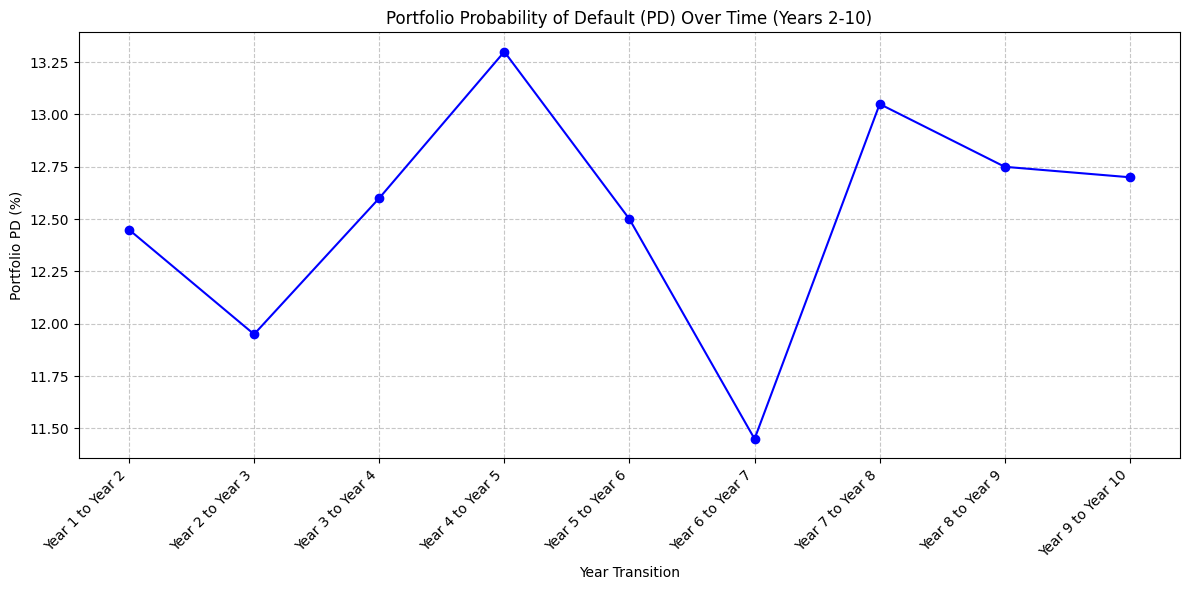

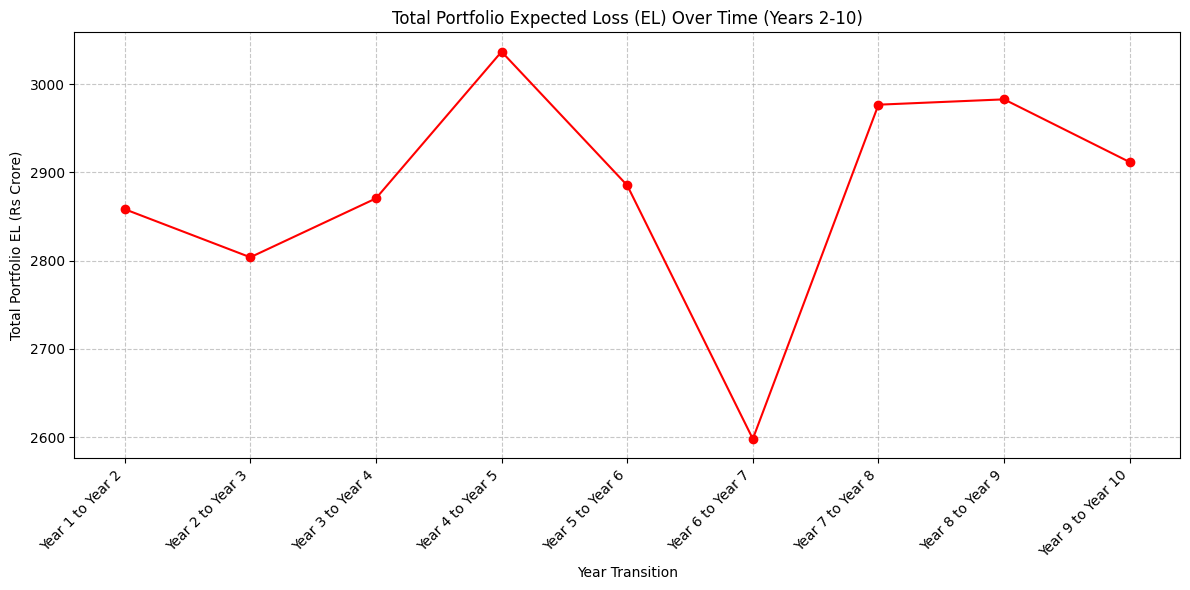

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# --- Plot Portfolio PD Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(portfolio_pds_df.index, portfolio_pds_df['Portfolio PD'] * 100, marker='o', color='blue')
plt.title('Portfolio Probability of Default (PD) Over Time (Years 2-10)')
plt.xlabel('Year Transition')
plt.ylabel('Portfolio PD (%)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# --- Plot Total Portfolio EL Over Time ---
plt.figure(figsize=(12, 6))
plt.plot(portfolio_els_df.index, portfolio_els_df['Total Portfolio EL (Rs Crore)'], marker='o', color='red')
plt.title('Total Portfolio Expected Loss (EL) Over Time (Years 2-10)')
plt.xlabel('Year Transition')
plt.ylabel('Total Portfolio EL (Rs Crore)')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

## (c)Estimated EL for each rating category and portfolio EL each year 2 to 10 using the given LGD and EAD values

EL = PD X LGD X EAD

In [ ]:
# The Estimated Expected Loss (EL) for a given rating category in a year transition
# is calculated using the formula: EL = PD * LGD * EAD.

estimated_els = {}
portfolio_els = {}

# Ensure borrower_ratings, borrower_lgd, borrower_ead are correctly assigned from the initial setup
# These are already defined globally from the initial data loading in the first cell
# borrower_ratings = ratings_df
# borrower_amount = amount_df
# borrower_lgd = lgd_df
# borrower_ead = ead_df

# It's important to use ratings_df, amount_df, lgd_df, ead_df directly as they are globally defined
# and are the source of truth for the data.

rating_years = [f'Year {i}' for i in range(1, 11)]

for i in range(len(rating_years) - 1):
    current_year_label = rating_years[i]
    next_year_label = rating_years[i+1]
    year_transition_label = f'{current_year_label} to {next_year_label}'

    estimated_pd_series = estimated_pds[year_transition_label]

    # Align ratings from the current year with LGDs and EADs from the next year
    temp_df = pd.DataFrame({
        'Rating': ratings_df[current_year_label].astype(str).str.strip().str.upper(),
        'LGD': lgd_df[next_year_label].astype(float),
        'Amount_Rs_Crore': amount_df[next_year_label].astype(float),
        'EAD_Mult': ead_df[next_year_label].astype(float)
    })
    temp_df['EAD_Rs_Crore'] = temp_df['Amount_Rs_Crore'] * temp_df['EAD_Mult']
    temp_df.dropna(subset=['Rating'], inplace=True)

    # Calculate average LGD and EAD for each rating category (based on current_year_label rating)
    average_lgd_by_rating = temp_df.groupby('Rating')['LGD'].mean().reindex(rating_order).fillna(0)
    average_ead_by_rating = temp_df.groupby('Rating')['EAD_Rs_Crore'].mean().reindex(rating_order).fillna(0)

    # Get borrower counts for the current year
    borrower_counts_current_year = borrower_count_by_rating[current_year_label].reindex(rating_order).fillna(0)

    # Calculate EL for each rating category (total EL for all borrowers in that rating)
    # First calculate EL per 'average' borrower, then multiply by total borrowers in that rating
    estimated_el_series_per_borrower = estimated_pd_series.reindex(rating_order).fillna(0) * average_lgd_by_rating * average_ead_by_rating
    estimated_el_series_total = estimated_el_series_per_borrower * borrower_counts_current_year
    estimated_els[year_transition_label] = estimated_el_series_total

    # Calculate total portfolio EL (sum of total EL per rating)
    total_portfolio_el = estimated_el_series_total.sum()
    portfolio_els[year_transition_label] = total_portfolio_el

print("\n--- Estimated EL per Rating Across All Years (Years 2-10) ---")
estimated_els_for_table = {year_transition: els.rename(year_transition) for year_transition, els in estimated_els.items()}
estimated_els_table = pd.concat(estimated_els_for_table, axis=1)
display(estimated_els_table.round(4))

print("\n--- Portfolio PD and Total Portfolio EL Per Year (Years 2-10) ---")
portfolio_pds_df = pd.DataFrame.from_dict(portfolio_pds, orient='index', columns=['Portfolio PD'])
portfolio_els_df = pd.DataFrame.from_dict(portfolio_els, orient='index', columns=['Total Portfolio EL (Rs Crore)'])
portfolio_summary_df = pd.concat([portfolio_pds_df, portfolio_els_df], axis=1)
display(portfolio_summary_df.style.format({
    'Portfolio PD': '{:.4f}',
    'Total Portfolio EL (Rs Crore)': '{:.2f}'
}))


--- Estimated EL per Rating Across All Years (Years 2-10) ---


,Year 1 to Year 2,Year 2 to Year 3,Year 3 to Year 4,Year 4 to Year 5,Year 5 to Year 6,Year 6 to Year 7,Year 7 to Year 8,Year 8 to Year 9,Year 9 to Year 10
AAA,324.5976,360.3414,347.9292,410.0824,363.3122,325.2215,373.4227,318.0790,312.3952
AA,350.4818,279.4555,251.1910,382.9781,272.3745,391.4983,463.5134,439.2520,428.0986
A,312.4771,308.2024,444.2072,329.8835,426.9103,287.6350,471.4198,356.8560,349.9675
BBB,426.2609,362.6866,377.5905,433.0604,355.3259,400.6312,332.7287,386.9495,342.7009
BB,383.6429,399.5798,396.2791,455.5636,319.1001,238.4139,304.5242,330.8618,404.6637
B,367.3776,335.5797,325.3344,341.1264,403.1043,340.6668,337.5816,408.2612,418.6435
C,350.4682,443.3916,363.1896,324.8079,293.0954,386.5108,320.7227,414.1969,295.4229
D,342.9718,314.5356,364.7479,359.2473,452.0593,227.3504,372.7879,328.2858,359.7187



--- Portfolio PD and Total Portfolio EL Per Year (Years 2-10) ---


,Portfolio PD,Total Portfolio EL (Rs Crore)
Year 1 to Year 2,0.1245,2858.28
Year 2 to Year 3,0.1195,2803.77
Year 3 to Year 4,0.1260,2870.47
Year 4 to Year 5,0.1330,3036.75
Year 5 to Year 6,0.1250,2885.28
Year 6 to Year 7,0.1145,2597.93
Year 7 to Year 8,0.1305,2976.70
Year 8 to Year 9,0.1275,2982.74
Year 9 to Year 10,0.1270,2911.61


#3. Finding cummulative probabilities

In [ ]:
states = list(final_ratings)
n = len(states)
state_idx = {s: i for i, s in enumerate(states)}

P_list = []
for k in range(1, 10): # transitions Year1->2 ... Year9->10
    transition_label = f"Year {k} to Year {k+1}" # Corrected label
    if transition_label in transition_matrices: # Check if the label exists in transition_matrices
        pm = transition_matrices[transition_label] # percent table (rows=start ratings)
        P = np.zeros((n, n), dtype=float)
        for r in states:
            for c in states:
                if (r in pm.index) and (c in pm.columns):
                    P[state_idx[r], state_idx[c]] = pm.at[r, c] / 100.0

        # Force D absorbing
        if 'D' in state_idx:
            iD = state_idx['D']
            P[iD, :] = 0.0
            P[iD, iD] = 1.0
        P_list.append(P)
    else:
        # If a matrix for a year is missing, we can append an identity matrix
        # or handle it based on specific requirements, here we'll append identity
        # for robustness if data for a year's transition is genuinely missing.
        P_list.append(np.eye(n))

# Starting distribution at Year 1 (count shares)
start_ratings = ratings_df[f"Year 1"].astype(str).str.strip().str.upper()
start_counts = start_ratings.value_counts().reindex(states, fill_value=0)
start_count_share = start_counts / start_counts.sum()

# Starting EAD per borrower at Year 1: EAD_amount = Amount * EAD_multiple
if 'Borrower Number' in amount_df.columns:
    amt_y1 = amount_df.set_index('Borrower Number')['Year 1']
    eadmult_y1 = ead_df.set_index('Borrower Number')['Year 1']
else:
    amt_y1 = amount_df['Year 1']
    eadmult_y1 = ead_df['Year 1']

ead_amounts = (amt_y1 * eadmult_y1).fillna(0)
rating_by_borrower = ratings_df.set_index('Borrower Number')['Year 1'].astype(str).str.strip().str.upper() if 'Borrower Number' in ratings_df.columns else ratings_df['Year 1'].astype(str).str.strip().str.upper()
ead_by_rating = ead_amounts.groupby(rating_by_borrower).sum().reindex(states, fill_value=0)
ead_share_by_state = ead_by_rating / ead_by_rating.sum()

# Helper: product P1 * P2 * ... * P_{H-1} for horizon H (end of Year H)
def P_total_for_horizon(H):
    # multiply P1..P_{H-1}; if H==1 return identity (no transitions)
    M = np.eye(n)
    steps = max(0, H - 1)   # number of matrices to multiply
    for i in range(steps):
        M = M.dot(P_list[i])
    return M

# Compute CPD for end of Year 5
H = 5
Ptot = P_total_for_horizon(H)   # product of P1..P_{H-1}
colD = state_idx['D']
pd_by_rating = pd.Series({s: Ptot[state_idx[s], colD] for s in states}).reindex(states).fillna(0)

portfolio_cpd_count = (pd_by_rating * start_count_share).sum()
portfolio_cpd_ead   = (pd_by_rating * ead_share_by_state).sum()

print(f"\n--- Cumulative PD by end of Year {H} ---")
print("CPD per starting rating (decimal):")
display(pd_by_rating.round(6))
print(f"Portfolio CPD (count-weighted) by end Year {H}: {portfolio_cpd_count:.6f}  (i.e. {portfolio_cpd_count*100:.4f} %)")
print(f"Portfolio CPD (EAD-weighted) by end Year {H}:   {portfolio_cpd_ead:.6f}  (i.e. {portfolio_cpd_ead*100:.4f} %)")

# Compute CPD for end of Year 10
H = 10
Ptot = P_total_for_horizon(H)   # product of P1..P_{H-1}
colD = state_idx['D']
pd_by_rating = pd.Series({s: Ptot[state_idx[s], colD] for s in states}).reindex(states).fillna(0)

portfolio_cpd_count = (pd_by_rating * start_count_share).sum()
portfolio_cpd_ead   = (pd_by_rating * ead_share_by_state).sum()

print(f"\n--- Cumulative PD by end of Year {H} ---")
print("CPD per starting rating (decimal):")
display(pd_by_rating.round(6))
print(f"Portfolio CPD (count-weighted) by end Year {H}: {portfolio_cpd_count:.6f}  (i.e. {portfolio_cpd_count*100:.4f} %)")
print(f"Portfolio CPD (EAD-weighted) by end Year {H}:   {portfolio_cpd_ead:.6f}  (i.e. {portfolio_cpd_ead*100:.4f} %)")


--- Cumulative PD by end of Year 5 ---
CPD per starting rating (decimal):


,0
AAA,0.413868
AA,0.413012
A,0.408139
BBB,0.430619
BB,0.425271
B,0.422285
C,0.414618
D,1.000000


Portfolio CPD (count-weighted) by end Year 5: 0.497051  (i.e. 49.7051 %)
Portfolio CPD (EAD-weighted) by end Year 5:   0.500240  (i.e. 50.0240 %)

--- Cumulative PD by end of Year 10 ---
CPD per starting rating (decimal):


,0
AAA,0.700917
AA,0.700481
A,0.697994
BBB,0.709465
BB,0.706737
B,0.705213
C,0.701300
D,1.000000


Portfolio CPD (count-weighted) by end Year 10: 0.743363  (i.e. 74.3363 %)
Portfolio CPD (EAD-weighted) by end Year 10:   0.744990  (i.e. 74.4990 %)


# 4. Stress testing Scenarios

## (A) For each year the LGD changes by the factors given for your group. Cap the max LGD at 100% and compute re-compute the EL for the portfolio year wise (stress EL) and compare this with normal EL.

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

#Stress factors for our group
stress_factors = {
    'Year 2': 1.46,
    'Year 3': 1.45,
    'Year 4': 1.34,
    'Year 5': 1.26,
    'Year 6': 1.42,
    'Year 7': 1.35,
    'Year 8': 1.39,
    'Year 9': 1.21,
    'Year 10':1.32
}

# Use the index from one of the estimated_pds series for consistent rating order
rating_order = list(estimated_pds['Year 1 to Year 2'].index)

years = range(1, 10)

baseline_el_by_year = {}
stressed_el_by_year = {}
el_by_rating_baseline = {}
el_by_rating_stressed = {}

def get_series(df, col):
    """Handles Borrower Number as column or index."""
    return df.set_index('Borrower Number')[col] if 'Borrower Number' in df.columns else df[col]

#Loop through each transition
for y in years:
    current_year_str = f"Year {y}"
    next_year_str = f"Year {y+1}"
    year_transition_str = f'{current_year_str} to {next_year_str}'

    # Ratings are from the current year, but LGD, EAD mult, and amount are for the next year (year of potential default)
    rating_start = get_series(ratings_df, current_year_str).astype(str).str.strip().str.upper()
    amount_start = get_series(amount_df, next_year_str).astype(float)
    lgd_start    = get_series(lgd_df,    next_year_str).astype(float)
    ead_mult     = get_series(ead_df,    next_year_str).astype(float)

    df_start = pd.DataFrame({
        'Rating': rating_start,
        'Amount_Rs_Cr': amount_start,
        'LGD': lgd_start,
        'EAD_mult': ead_mult
    }).dropna(subset=['Rating'])

    # Computing absolute EAD
    df_start['EAD_Rs_Cr'] = df_start['Amount_Rs_Cr'] * df_start['EAD_mult']

    # Getting PD mapping for this year transition from estimated_pds
    pd_map = (estimated_pds[year_transition_str]).to_dict() # Removed extra / 100.0
    df_start['PD'] = df_start['Rating'].map(pd_map).fillna(0)

    # Baseline EL = PD × LGD × EAD
    df_start['EL_baseline'] = df_start['PD'] * df_start['LGD'] * df_start['EAD_Rs_Cr']

    # Stressed LGD = LGD × stress_factor (cap at 1.0)
    factor = stress_factors.get(next_year_str, 1.0)
    df_start['LGD_stressed'] = (df_start['LGD'] * factor).clip(upper=1.0)

    # Stressed EL
    df_start['EL_stressed'] = df_start['PD'] * df_start['LGD_stressed'] * df_start['EAD_Rs_Cr']

    # Aggregating EL by rating
    el_base = df_start.groupby('Rating')['EL_baseline'].sum().reindex(rating_order).fillna(0)
    el_stress = df_start.groupby('Rating')['EL_stressed'].sum().reindex(rating_order).fillna(0)

    el_by_rating_baseline[next_year_str] = el_base
    el_by_rating_stressed[next_year_str] = el_stress

    # Portfolio total
    baseline_el_by_year[next_year_str] = el_base.sum()
    stressed_el_by_year[next_year_str] = el_stress.sum()

# Combining into summary tables
summary = pd.DataFrame({
    'Baseline_EL_RsCr': pd.Series(baseline_el_by_year),
    'Stressed_EL_RsCr': pd.Series(stressed_el_by_year)
})
summary['Impact_RsCr'] = summary['Stressed_EL_RsCr'] - summary['Baseline_EL_RsCr']
summary['Impact_%'] = (summary['Impact_RsCr'] / summary['Baseline_EL_RsCr']) * 100.0

el_rating_baseline_df = pd.DataFrame(el_by_rating_baseline)
el_rating_stressed_df = pd.DataFrame(el_by_rating_stressed)
el_rating_impact_df = el_rating_stressed_df - el_rating_baseline_df
el_rating_impact_pct = (el_rating_impact_df / el_rating_baseline_df.replace({0: np.nan})) * 100

# Display results
print("=== Portfolio Expected Loss: Baseline vs Stressed ===")
display(summary.round(3))

print("\n=== Expected Loss by Rating (Baseline) ===")
display(el_rating_baseline_df.round(3))

print("\n=== Expected Loss by Rating (Stressed) ===")
display(el_rating_stressed_df.round(3))

print("\n=== Impact by Rating (₹ Crore) ===")
display(el_rating_impact_df.round(3))

print("\n=== Impact by Rating (%) ===")
display(el_rating_impact_pct.round(2))

=== Portfolio Expected Loss: Baseline vs Stressed ===


,Baseline_EL_RsCr,Stressed_EL_RsCr,Impact_RsCr,Impact_%
Year 2,2881.353,3959.968,1078.615,37.434
Year 3,2787.151,3814.389,1027.238,36.856
Year 4,2887.207,3762.235,875.029,30.307
Year 5,3072.178,3815.370,743.192,24.191
Year 6,2903.285,3912.401,1009.116,34.758
Year 7,2596.130,3407.549,811.419,31.255
Year 8,2983.126,3965.891,982.765,32.944
Year 9,2960.751,3561.011,600.260,20.274
Year 10,2934.288,3779.201,844.913,28.794



=== Expected Loss by Rating (Baseline) ===


,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Rating,,,,,,,,,
AAA,331.158,367.132,357.268,407.123,354.654,323.830,376.535,313.958,309.656
AA,348.417,280.267,250.931,392.598,276.972,396.586,460.192,447.286,430.176
A,321.421,300.639,455.233,335.010,432.683,292.381,465.111,357.410,355.537
BBB,414.212,361.232,372.235,434.461,364.818,391.240,326.959,386.347,350.368
BB,395.008,401.081,395.563,465.962,325.960,238.923,301.376,325.492,407.422
B,375.235,339.557,326.804,346.229,410.679,343.569,350.480,403.451,418.340
C,351.556,431.048,364.093,335.041,290.907,384.926,324.355,402.757,303.302
D,344.345,306.196,365.080,355.753,446.612,224.674,378.118,324.051,359.487



=== Expected Loss by Rating (Stressed) ===


,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Rating,,,,,,,,,
AAA,455.667,504.433,465.232,507.304,479.562,424.760,498.064,377.651,402.382
AA,478.299,386.004,326.458,486.275,370.247,523.170,611.703,538.313,551.887
A,446.636,408.547,592.616,414.963,582.753,380.201,617.033,429.112,457.956
BBB,570.636,500.731,484.806,539.300,490.002,510.406,437.891,464.654,450.357
BB,531.708,545.677,516.643,579.223,440.703,315.143,404.016,391.389,523.385
B,515.629,462.207,427.710,428.587,556.981,453.569,466.265,485.253,538.027
C,483.649,588.657,474.914,417.538,395.685,505.958,428.634,484.120,391.039
D,477.744,418.132,473.856,442.178,596.469,294.341,502.285,390.519,464.166



=== Impact by Rating (₹ Crore) ===


,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Rating,,,,,,,,,
AAA,124.509,137.302,107.964,100.181,124.908,100.930,121.528,63.693,92.726
AA,129.882,105.737,75.526,93.677,93.275,126.584,151.511,91.027,121.711
A,125.215,107.908,137.383,79.953,150.069,87.820,151.921,71.702,102.419
BBB,156.424,139.499,112.571,104.839,125.184,119.166,110.933,78.307,99.990
BB,136.700,144.596,121.080,113.262,114.743,76.220,102.640,65.897,115.964
B,140.394,122.651,100.907,82.358,146.302,110.000,115.785,81.802,119.687
C,132.093,157.608,110.821,82.496,104.778,121.031,104.280,81.364,87.737
D,133.399,111.937,108.777,86.425,149.857,69.667,124.167,66.467,104.679



=== Impact by Rating (%) ===


,Year 2,Year 3,Year 4,Year 5,Year 6,Year 7,Year 8,Year 9,Year 10
Rating,,,,,,,,,
AAA,37.60,37.40,30.22,24.61,35.22,31.17,32.28,20.29,29.94
AA,37.28,37.73,30.10,23.86,33.68,31.92,32.92,20.35,28.29
A,38.96,35.89,30.18,23.87,34.68,30.04,32.66,20.06,28.81
BBB,37.76,38.62,30.24,24.13,34.31,30.46,33.93,20.27,28.54
BB,34.61,36.05,30.61,24.31,35.20,31.90,34.06,20.25,28.46
B,37.41,36.12,30.88,23.79,35.62,32.02,33.04,20.28,28.61
C,37.57,36.56,30.44,24.62,36.02,31.44,32.15,20.20,28.93
D,38.74,36.56,29.80,24.29,33.55,31.01,32.84,20.51,29.12


## 4(B)
#	Consider the given ratings for year 9 and consider they slip to the categories mentioned for your group for example group 15 all AAA category loans in year 9 will be now rated A in year 10. Assuming the same LGD and EAD for year 10 compute the EL. Compare this with year 10 EL and note your observations


--- Baseline vs. Stressed Portfolio EL Comparison (Years 2-10) ---


,Baseline Portfolio EL (Rs Crore),Stressed Portfolio EL (Rs Crore)
Year 1 to Year 2,2858.28,3959.97
Year 2 to Year 3,2803.77,3814.39
Year 3 to Year 4,2870.47,3762.24
Year 4 to Year 5,3036.75,3815.37
Year 5 to Year 6,2885.28,3912.40
Year 6 to Year 7,2597.93,3407.55
Year 7 to Year 8,2976.70,3965.89
Year 8 to Year 9,2982.74,3561.01
Year 9 to Year 10,2911.61,3779.20


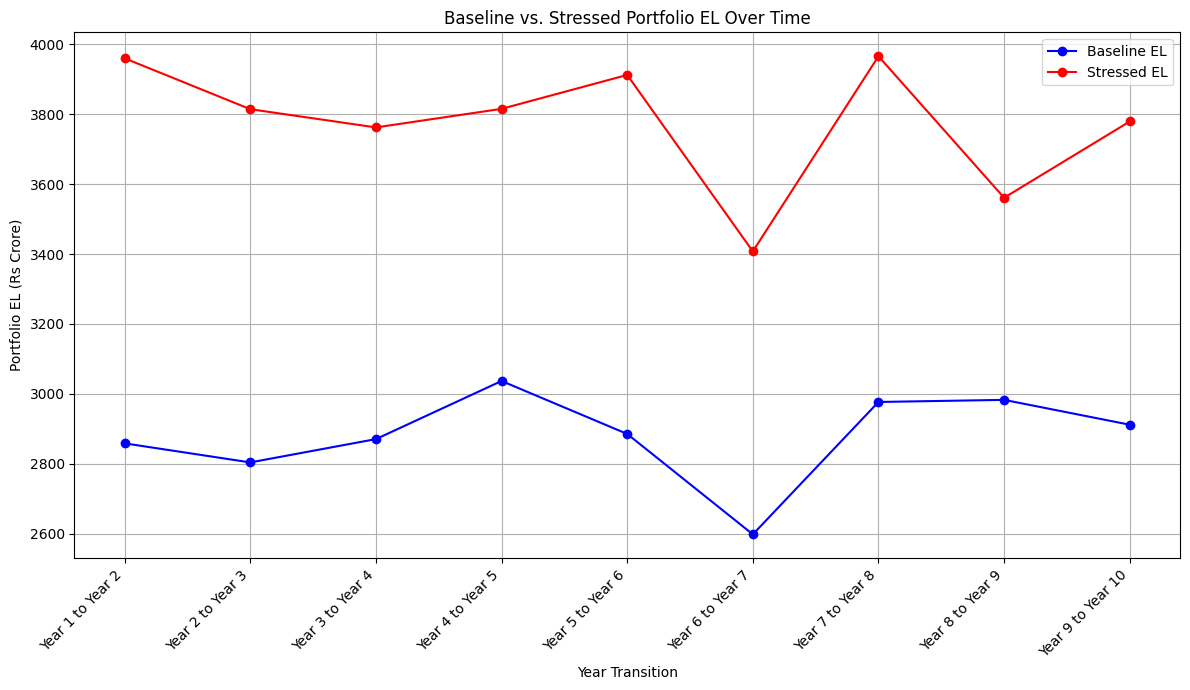


--- Percentage Increase in Portfolio EL Under Stress ---


,Percentage Increase (%)
Year 1 to Year 2,38.54%
Year 2 to Year 3,36.04%
Year 3 to Year 4,31.07%
Year 4 to Year 5,25.64%
Year 5 to Year 6,35.60%
Year 6 to Year 7,31.16%
Year 7 to Year 8,33.23%
Year 8 to Year 9,19.39%
Year 9 to Year 10,29.80%


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display

# =====================================
#  Comparing Baseline and Stressed EL
# =====================================

# Create portfolio_stressed_els_df from stressed_el_by_year for concatenation
# Aligning keys: 'Year X' in stressed_el_by_year corresponds to 'Year X-1 to Year X' in portfolio_els_df
portfolio_stressed_els_data = {}
for year_key, el_value in stressed_el_by_year.items():
    # year_key is like 'Year 2', 'Year 3', ...
    year_num = int(year_key.split()[1])
    if year_num > 1:
        transition_label = f'Year {year_num-1} to Year {year_num}'
        portfolio_stressed_els_data[transition_label] = el_value

portfolio_stressed_els_df = pd.DataFrame.from_dict(portfolio_stressed_els_data, orient='index', columns=['Stressed Portfolio EL (Rs Crore)'])

# Concatenate the baseline EL (portfolio_els_df) and stressed EL (portfolio_stressed_els_df) DataFrames
portfolio_el_comparison_df = pd.concat([portfolio_els_df, portfolio_stressed_els_df], axis=1)

# Rename the columns for clarity
portfolio_el_comparison_df.columns = ['Baseline Portfolio EL (Rs Crore)', 'Stressed Portfolio EL (Rs Crore)']

# Display the comparison DataFrame
print("\n--- Baseline vs. Stressed Portfolio EL Comparison (Years 2-10) ---")
display(portfolio_el_comparison_df.style.format({
    'Baseline Portfolio EL (Rs Crore)': '{:.2f}',
    'Stressed Portfolio EL (Rs Crore)': '{:.2f}'
}))

# Create a line plot comparing the baseline and stressed EL trends
plt.figure(figsize=(12, 7))

plt.plot(portfolio_el_comparison_df.index, portfolio_el_comparison_df['Baseline Portfolio EL (Rs Crore)'], marker='o', color='blue', label='Baseline EL')
plt.plot(portfolio_el_comparison_df.index, portfolio_el_comparison_df['Stressed Portfolio EL (Rs Crore)'], marker='o', color='red', label='Stressed EL')

plt.title("Baseline vs. Stressed Portfolio EL Over Time")
plt.xlabel("Year Transition")
plt.ylabel("Portfolio EL (Rs Crore)")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45, ha='right') # Rotate x-axis labels
plt.tight_layout() # Adjust layout to prevent overlap

plt.show()

# Calculate the percentage increase in EL under the stress scenario
portfolio_el_comparison_df['Percentage Increase (%)'] = ((portfolio_el_comparison_df['Stressed Portfolio EL (Rs Crore)'] - portfolio_el_comparison_df['Baseline Portfolio EL (Rs Crore)']) / portfolio_el_comparison_df['Baseline Portfolio EL (Rs Crore)']) * 100

print("\n--- Percentage Increase in Portfolio EL Under Stress ---")
display(portfolio_el_comparison_df['Percentage Increase (%)'].to_frame().style.format('{:.2f}%'))

In [ ]:
import pandas as pd
import numpy as np
from IPython.display import display

# provided slip mapping
slip_map = {
    'AAA': 'AA',
    'AA' : 'BB',
    'A'  : 'BB',
    'BBB': 'C',
    'BB' : 'B',
    'C'  : 'C',
    'D'  : 'D'
}

def get_series(df, col):
    return df.set_index('Borrower Number')[col] if 'Borrower Number' in df.columns else df[col]

# Prepare Year10 baseline borrower-level data
# Ratings: actual Year10 ratings (baseline)
rating_y10 = get_series(ratings_df, "Year 10").astype(str).str.strip().str.upper()
# Ratings at Year9 (for slip mapping)
rating_y9 = get_series(ratings_df, "Year 9").astype(str).str.strip().str.upper()

# EAD and LGD at Year10 (use Amount * EAD_multiple -> absolute EAD in ₹ crore)
amount_y10 = get_series(amount_df, "Year 10").astype(float)
eadmult_y10 = get_series(ead_df, "Year 10").astype(float)
lgd_y10 = get_series(lgd_df, "Year 10").astype(float)

eadd_amount_y10 = (amount_y10 * eadmult_y10).fillna(0)

# Build borrower-level DataFrame indexed by borrower identifier (if present) or default index
borrowers = pd.DataFrame({
    'Rating_Y9': rating_y9,
    'Rating_Y10_actual': rating_y10,
    'Amount_Rs_Cr_Y10': amount_y10,
    'EAD_mult_Y10': eadmult_y10,
    'EAD_Rs_Cr_Y10': lgd_y10,
    'LGD_Y10': lgd_y10
})

# Baseline EL for Year10 (using actual Year10 ratings)
# PD mapping: PD for Year10 from estimated_pds_table (PD in % -> decimal)
pd_map_year10 = (estimated_pds_table['Year 9 to Year 10']).to_dict()

borrowers['PD_baseline'] = borrowers['Rating_Y10_actual'].map(pd_map_year10).fillna(0)
borrowers['EL_baseline'] = borrowers['PD_baseline'] * borrowers['LGD_Y10'] * borrowers['EAD_Rs_Cr_Y10']

# Aggregating baseline
el_baseline_by_rating = borrowers.groupby('Rating_Y10_actual')['EL_baseline'].sum().rename_axis('Rating')
portfolio_el_baseline = borrowers['EL_baseline'].sum()

# Slip scenario: derive new Year10 rating from Year9 rating and compute EL
borrowers['Rating_Y10_slip'] = borrowers['Rating_Y9'].map(slip_map).fillna(borrowers['Rating_Y10_actual'])
# PD for slipped rating using same pd_map_year10
borrowers['PD_slip'] = borrowers['Rating_Y10_slip'].map(pd_map_year10).fillna(0)
borrowers['EL_slip'] = borrowers['PD_slip'] * borrowers['LGD_Y10'] * borrowers['EAD_Rs_Cr_Y10']

# Aggregate slip
el_slip_by_rating = borrowers.groupby('Rating_Y10_slip')['EL_slip'].sum().rename_axis('Rating')
portfolio_el_slip = borrowers['EL_slip'].sum()

# ----------------- Compare and display results -----------------
print("Year 10 EL — Baseline vs Slip scenario\n")

# Create a DataFrame for portfolio-level comparison
portfolio_comparison = pd.DataFrame({
    'Metric': ['Portfolio EL (Baseline)', 'Portfolio EL (Slip)', 'Absolute Impact', 'Relative Impact (%)'],
    'Value': [
        portfolio_el_baseline,
        portfolio_el_slip,
        portfolio_el_slip - portfolio_el_baseline,
        ((portfolio_el_slip - portfolio_el_baseline) / portfolio_el_baseline * 100)
    ]
})
portfolio_comparison.set_index('Metric', inplace=True)
display(portfolio_comparison.style.format('{:,.2f}'))

print("\nEL by rating — Baseline (Rating = actual Year10 rating):")
display(el_baseline_by_rating.sort_index().round(4))

print("EL by rating — Slip scenario (Rating = slipped Year10 rating):")
display(el_slip_by_rating.sort_index().round(4))

# Optional: show a small sample of borrowers with rating change Year9 -> Year10 (actual -> slipped):
print("\nSample of borrowers with rating change Year9 -> Year10 (actual -> slipped):")
changed = borrowers[borrowers['Rating_Y10_actual'] != borrowers['Rating_Y10_slip']].copy()
display(changed[['Rating_Y9','Rating_Y10_actual','Rating_Y10_slip','LGD_Y10','EAD_Rs_Cr_Y10','PD_baseline','PD_slip','EL_baseline','EL_slip']].head(10))

# If you prefer a neat summary table by rating (baseline vs slip):
summary_by_rating = pd.DataFrame({
    'EL_baseline': el_baseline_by_rating,
    'EL_slip': el_slip_by_rating.reindex(el_baseline_by_rating.index, fill_value=0)
}).fillna(0)
summary_by_rating['Impact_RsCr'] = summary_by_rating['EL_slip'] - summary_by_rating['EL_baseline']
summary_by_rating['Impact_pct'] = (summary_by_rating['Impact_RsCr'] / summary_by_rating['EL_baseline'].replace({0: np.nan})) * 100.0
print("\nSummary by rating (Baseline vs Slip):")
display(summary_by_rating.round(4))

NameError: name 'ratings_df' is not defined